In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [ ]:
import math

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

### IMDB Test

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

In [ ]:
print('laoding data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
print(len(input_train), 'train_')
print(len(input_test), 'test_')

print(input_train.shape)
print(input_test.shape)

In [ ]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

input_train.shape
input_test.shape

In [ ]:
input_train[0]

In [ ]:
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import LSTM

In [ ]:
model = Sequential()

In [ ]:
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

# Tune start

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv('./extract_seoul.csv')

In [3]:
data = data.drop(['Unnamed: 0'],1)

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 30 columns):
Date               188 non-null datetime64[ns]
Total              188 non-null float64
Seoul              188 non-null float64
Northern seoul     188 non-null float64
Gangbuk-gu         188 non-null float64
Gwangjin-gu        188 non-null float64
Nowon-gu           188 non-null float64
Dobong-gu          188 non-null float64
Dongdaemun-gu      188 non-null float64
Mapo-gu            188 non-null float64
Seodaemun-gu       188 non-null float64
Seongdong-gu       188 non-null float64
Seongbuk-gu        188 non-null float64
Yongsan-gu         188 non-null float64
Eunpyeong-gu       188 non-null float64
Jongno-gu          188 non-null float64
Jung-gu            188 non-null float64
Jungnang-gu        188 non-null float64
Southern Seoul     188 non-null float64
Gangnam-gu         188 non-null float64
Gangdong-gu        188 non-null float64
Gangseo-gu         188 non-null float64
Gwanak-g

In [6]:
GU_ENG_NAME = ''

### Dict 관련 함수 선언

In [7]:
def create_dict(a, b):
    d = dict()
    #갯수 다르면
    if len(a)-len(b) != 0:
        for i in range(len(a)-len(b)):
            b.append(None)
    #갯수 같으면
    for j in range(len(a)):
        d[a[j]] = b[j]
    return d

In [8]:
def find_val_using_key(dic, key):
    if key in dic:
        return dic[key]
    else:
        print('404 not found')
        return dic['서울']

In [9]:
def find_key_using_val(dic, val):
    return [k for k, v in dic.items() if v == val][0]

### 원하는 구만 선택하기

In [10]:
def select_gu_data(df, gu_name):
    gu_name += '-gu'
    global GU_ENG_NAME
    
    GU_ENG_NAME = gu_name
    
    return df[['Date', gu_name]]
    

In [52]:
BASE_PATH = './TimeSeries/'
MODEL_NAME = 'LSTM'

In [53]:
gangnam = select_gu_data(data, 'Gangnam')
print(GU_ENG_NAME)
# gangnam_array = np.array(gangnam)
# gangnam_data = gangnam_array.reshape(-1,1)
# gangnam_data.shape

Gangnam-gu


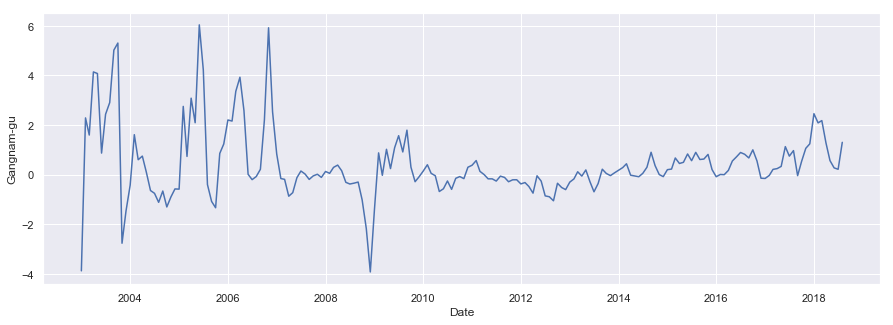

In [54]:
plt.figure(figsize = (15, 5))
ax = sns.lineplot(x="Date", y=GU_ENG_NAME, data=gangnam)

In [74]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle

In [103]:
import math

In [75]:
gangnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
Date          188 non-null datetime64[ns]
Gangnam-gu    188 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [76]:
mask = pd.to_datetime('2010-01-01')
tmp = gangnam.loc[:][gangnam['Date'] >= mask]

In [77]:
gangnam_tmp = tmp.drop('Date', 1)

In [78]:
gangnam_tmp

,Gangnam-gu
84,0.146998
85,0.401215
86,0.054086
87,-0.042543
88,-0.678413
89,-0.567626
90,-0.254231
91,-0.591100
92,-0.146213
93,-0.075991


### Normalize

In [79]:
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(gangnam_tmp)

In [80]:
dataset

array([[0.34161309],
       [0.41399694],
       [0.31515787],
       [0.28764442],
       [0.10659095],
       [0.13813561],
       [0.22736977],
       [0.13145184],
       [0.25812596],
       [0.27812051],
       [0.25453416],
       [0.38518202],
       [0.40807148],
       [0.4620269 ],
       [0.33802372],
       [0.30129167],
       [0.25218556],
       [0.25185434],
       [0.22652257],
       [0.28290495],
       [0.26834486],
       [0.21884845],
       [0.24098452],
       [0.24156698],
       [0.19396314],
       [0.2093965 ],
       [0.16411628],
       [0.08794883],
       [0.28715331],
       [0.22577299],
       [0.05649797],
       [0.04641818],
       [0.        ],
       [0.20161524],
       [0.15261872],
       [0.12839877],
       [0.21444004],
       [0.25118653],
       [0.33334945],
       [0.28397418],
       [0.35422305],
       [0.21846023],
       [0.1035275 ],
       [0.19847166],
       [0.36285748],
       [0.31389134],
       [0.28915095],
       [0.320

In [81]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (83, 21)


In [82]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [83]:
window_size = 4

In [84]:
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)

whole_X, whole_Y = create_dataset(dataset, window_size)
print("Original training data shape:")
print(whole_X.shape)
print(whole_Y.shape)

Original training data shape:
(99, 4)
(99,)


In [85]:
train_Y[:10]

array([0.10659095, 0.13813561, 0.22736977, 0.13145184, 0.25812596,
       0.27812051, 0.25453416, 0.38518202, 0.40807148, 0.4620269 ])

In [86]:
# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

whole_X = np.reshape(whole_X, (whole_X.shape[0], 1, whole_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

New training data shape:
(78, 1, 4)


In [183]:
MODEL_PATH = ''


if not os.path.exists(BASE_PATH):
    os.mkdir(BASE_PATH)

def create_checkpoint(model_name):
    global MODEL_PATH
    MODEL_PATH = os.path.join(BASE_PATH, model_name)
    print("Model_path : ", MODEL_PATH)
    
    MODEL_PATH = MODEL_PATH + "/" + GU_ENG_NAME
    
    if not os.path.exists(MODEL_PATH):
        os.mkdir(MODEL_PATH)
    
    return ModelCheckpoint(filepath=os.path.join(MODEL_PATH, 'loss-{loss:.6f}.hdf5'),
                           monitor='loss',
                           verbose=1,
                           save_best_only=True)

early_stopping = EarlyStopping(monitor='loss', patience=50)

In [184]:
def Model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(12,return_sequences=True, input_shape = (1, window_size)))
    model.add(LSTM(12,return_sequences=True))
    model.add(LSTM(12))
    model.add(Dense(1))
    
    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    checkloss = create_checkpoint(MODEL_NAME)
    
    model.compile(loss = "mean_squared_error", 
                  optimizer = adam)

    model.summary()
    
    checkloss = create_checkpoint(MODEL_NAME)
    
    # Validation_split으로 validation 얼마나 해줄건지 정해중!
#     history = model.fit(x_train, y_train,
#                   batch_size=batch_size,
#                   epochs=max_epochs,
#                   validation_split = 0.1,
#                   shuffle=True,
#                   callbacks=[checkloss, early_stopping])
    history = model.fit(train_X, train_Y, epochs = 500, batch_size = 2, verbose = 2, callbacks=[early_stopping, checkloss])
    
    return model, history

In [116]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    model.add(LSTM(12,return_sequences=True, input_shape = (1, window_size)))
    model.add(LSTM(12,return_sequences=True))
    model.add(LSTM(12))
    model.add(Dense(1))
    
#     adam = Adam(lr=0.00146, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    checkloss = create_checkpoint(MODEL_NAME)
    
    model.compile(loss = "mean_squared_error", optimizer = adam)
    model.fit(train_X, train_Y, epochs = 500, batch_size = 4, verbose = 2, callbacks=[early_stopping, checkloss])
    
    return(model)

In [185]:
model = Model(train_X, train_Y, window_size)

Model_path :  ./TimeSeries/LSTM
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 1, 12)             816       
_________________________________________________________________
lstm_26 (LSTM)               (None, 1, 12)             1200      
_________________________________________________________________
lstm_27 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 13        
Total params: 3,229
Trainable params: 3,229
Non-trainable params: 0
_________________________________________________________________
Model_path :  ./TimeSeries/LSTM
Epoch 1/500
 - 5s - loss: 0.1047

Epoch 00001: loss improved from inf to 0.10466, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.104660.hdf5
Epoch 2/500
 - 0s - loss: 0.0818

Epoch 00002: loss improved f


Epoch 00055: loss improved from 0.00781 to 0.00779, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.007791.hdf5
Epoch 56/500
 - 0s - loss: 0.0077

Epoch 00056: loss improved from 0.00779 to 0.00765, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.007655.hdf5
Epoch 57/500
 - 0s - loss: 0.0076

Epoch 00057: loss improved from 0.00765 to 0.00763, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.007633.hdf5
Epoch 58/500
 - 0s - loss: 0.0076

Epoch 00058: loss did not improve from 0.00763
Epoch 59/500
 - 0s - loss: 0.0076

Epoch 00059: loss improved from 0.00763 to 0.00760, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.007605.hdf5
Epoch 60/500
 - 0s - loss: 0.0076

Epoch 00060: loss did not improve from 0.00760
Epoch 61/500
 - 0s - loss: 0.0077

Epoch 00061: loss did not improve from 0.00760
Epoch 62/500
 - 0s - loss: 0.0077

Epoch 00062: loss did not improve from 0.00760
Epoch 63/500
 - 0s - loss: 0.0076

Epoch 00063: loss improved from 0.00760 to 0.00760, saving model to

 - 0s - loss: 0.0068

Epoch 00134: loss did not improve from 0.00680
Epoch 135/500
 - 0s - loss: 0.0069

Epoch 00135: loss did not improve from 0.00680
Epoch 136/500
 - 0s - loss: 0.0068

Epoch 00136: loss improved from 0.00680 to 0.00675, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.006753.hdf5
Epoch 137/500
 - 0s - loss: 0.0068

Epoch 00137: loss did not improve from 0.00675
Epoch 138/500
 - 0s - loss: 0.0069

Epoch 00138: loss did not improve from 0.00675
Epoch 139/500
 - 0s - loss: 0.0069

Epoch 00139: loss did not improve from 0.00675
Epoch 140/500
 - 0s - loss: 0.0069

Epoch 00140: loss did not improve from 0.00675
Epoch 141/500
 - 0s - loss: 0.0069

Epoch 00141: loss did not improve from 0.00675
Epoch 142/500
 - 0s - loss: 0.0068

Epoch 00142: loss did not improve from 0.00675
Epoch 143/500
 - 0s - loss: 0.0071

Epoch 00143: loss did not improve from 0.00675
Epoch 144/500
 - 0s - loss: 0.0073

Epoch 00144: loss did not improve from 0.00675
Epoch 145/500
 - 0s - loss: 0.00


Epoch 00227: loss did not improve from 0.00659
Epoch 228/500
 - 0s - loss: 0.0067

Epoch 00228: loss did not improve from 0.00659
Epoch 229/500
 - 0s - loss: 0.0066

Epoch 00229: loss did not improve from 0.00659
Epoch 230/500
 - 0s - loss: 0.0069

Epoch 00230: loss did not improve from 0.00659
Epoch 231/500
 - 0s - loss: 0.0069

Epoch 00231: loss did not improve from 0.00659
Epoch 232/500
 - 0s - loss: 0.0066

Epoch 00232: loss did not improve from 0.00659
Epoch 233/500
 - 0s - loss: 0.0067

Epoch 00233: loss did not improve from 0.00659
Epoch 234/500
 - 0s - loss: 0.0067

Epoch 00234: loss did not improve from 0.00659
Epoch 235/500
 - 0s - loss: 0.0069

Epoch 00235: loss did not improve from 0.00659
Epoch 236/500
 - 0s - loss: 0.0066

Epoch 00236: loss did not improve from 0.00659
Epoch 237/500
 - 0s - loss: 0.0066

Epoch 00237: loss did not improve from 0.00659
Epoch 238/500
 - 0s - loss: 0.0067

Epoch 00238: loss did not improve from 0.00659
Epoch 239/500
 - 0s - loss: 0.0068

Epo

 - 0s - loss: 0.0066

Epoch 00322: loss did not improve from 0.00655
Epoch 323/500
 - 0s - loss: 0.0067

Epoch 00323: loss did not improve from 0.00655
Epoch 324/500
 - 0s - loss: 0.0066

Epoch 00324: loss did not improve from 0.00655
Epoch 325/500
 - 0s - loss: 0.0066

Epoch 00325: loss did not improve from 0.00655
Epoch 326/500
 - 0s - loss: 0.0069

Epoch 00326: loss did not improve from 0.00655
Epoch 327/500
 - 0s - loss: 0.0067

Epoch 00327: loss did not improve from 0.00655
Epoch 328/500
 - 0s - loss: 0.0066

Epoch 00328: loss did not improve from 0.00655
Epoch 329/500
 - 0s - loss: 0.0066

Epoch 00329: loss did not improve from 0.00655
Epoch 330/500
 - 0s - loss: 0.0068

Epoch 00330: loss did not improve from 0.00655
Epoch 331/500
 - 0s - loss: 0.0066

Epoch 00331: loss did not improve from 0.00655
Epoch 332/500
 - 0s - loss: 0.0065

Epoch 00332: loss improved from 0.00655 to 0.00650, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.006500.hdf5
Epoch 333/500
 - 0s - loss: 0.00


Epoch 00418: loss did not improve from 0.00649
Epoch 419/500
 - 0s - loss: 0.0067

Epoch 00419: loss did not improve from 0.00649
Epoch 420/500
 - 0s - loss: 0.0065

Epoch 00420: loss did not improve from 0.00649
Epoch 421/500
 - 0s - loss: 0.0066

Epoch 00421: loss did not improve from 0.00649
Epoch 422/500
 - 0s - loss: 0.0066

Epoch 00422: loss did not improve from 0.00649


In [ ]:
# model1 = fit_model(train_X, train_Y, window_size)

In [186]:
def predict_and_score(model, X, Y):
    pred = scaler.inverse_transform(model.predict(X))
    # 0 ~ 1 inverse origin
    orig_data = scaler.inverse_transform([Y])
    
    #RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

In [187]:
rmse_train, train_predict = predict_and_score(model[0], train_X, train_Y)
rmse_test, test_predict = predict_and_score(model[0], test_X, test_Y)

whole_test, whole_predict = predict_and_score(model[0], whole_X, whole_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)
print("Whole data score: %.2f RMSE " % whole_test)

Training data score: 0.28 RMSE
Test data score: 0.58 RMSE
Whole data score: 0.35 RMSE 


In [188]:
def start_predict_n_plot(dataset, train_predict, test_predict):
    train_predict_plot = np.empty_like(dataset)
    train_predict_plot[:, :] = np.nan
    
    ##땡기자
    print("window_size: ", window_size)
    train_predict_plot[(window_size - 1) : len(train_predict) + (window_size - 1)] = train_predict

    
    test_predict_plot = np.empty_like(dataset)
    test_predict_plot[:, :] = np.nan
#     test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1] = test_predict
    test_predict_plot[(window_size - 1): len(whole_predict) + (window_size - 1), :] = whole_predict
    
    print(test_predict_plot.shape)
    print(whole_predict.shape)

    plt.figure(figsize = (15, 5))
    plt.plot(scaler.inverse_transform(dataset), label = "True value")
    plt.plot(train_predict_plot, label = "Training set pred")
    plt.plot(test_predict_plot, label = "Test set pred")
    plt.xlabel("Month")
    plt.ylabel("Price")
    plt.title("Gangnam Train/test Predict")
    plt.legend()
    plt.show()

window_size:  4
(104, 1)
(99, 1)


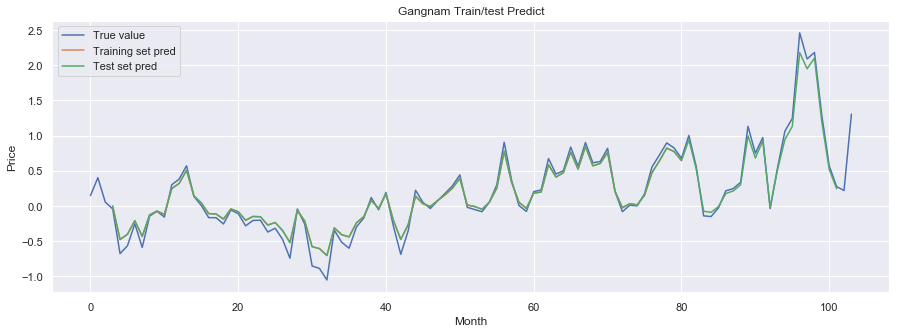

In [189]:
start_predict_n_plot(dataset, train_predict, test_predict)

In [137]:
def get_best_weights_path():
    result = MODEL_PATH +"/"+sorted(os.listdir(MODEL_PATH))[0]
    print("best model path: ", result)
    
    return result

In [194]:
best_model = get_best_weights_path()

best model path:  ./TimeSeries/LSTM/Gangnam-gu/loss-0.006471.hdf5


In [195]:
model1.load_weights(best_model)

In [192]:
def run_loaded_model(model, train_X, train_Y, window_size = 1):
    adam = Adam(lr=0.00146, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=1e-6, amsgrad=False)
    model.compile(loss = "mean_squared_error", 
                  optimizer = adam)
    model.summary()
    
    checkloss = create_checkpoint(MODEL_NAME)
    history = model.fit(train_X, train_Y, epochs = 1000, batch_size = 4, verbose = 2, callbacks=[early_stopping, checkloss])
    
    return model, history

In [193]:
model2 = run_loaded_model(model1, train_X, train_Y, window_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 1, 12)             816       
_________________________________________________________________
lstm_20 (LSTM)               (None, 1, 12)             1200      
_________________________________________________________________
lstm_21 (LSTM)               (None, 12)                1200      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 3,229
Trainable params: 3,229
Non-trainable params: 0
_________________________________________________________________
Model_path :  ./TimeSeries/LSTM
Epoch 1/1000
 - 5s - loss: 0.0069

Epoch 00001: loss improved from inf to 0.00687, saving model to ./TimeSeries/LSTM/Gangnam-gu/loss-0.006870.hdf5
Epoch 2/1000
 - 0s - loss: 0.0067

Epoch 00002: loss improved from 0.00687 to 0.00673, saving

In [196]:
rmse_train, train_predict = predict_and_score(model2[0], train_X, train_Y)
rmse_test, test_predict = predict_and_score(model2[0], test_X, test_Y)

whole_test, whole_predict = predict_and_score(model2[0], whole_X, whole_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)
print("Whole data score: %.2f RMSE " % whole_test)

Training data score: 0.28 RMSE
Test data score: 0.59 RMSE
Whole data score: 0.35 RMSE 


window_size:  4
(104, 1)
(99, 1)


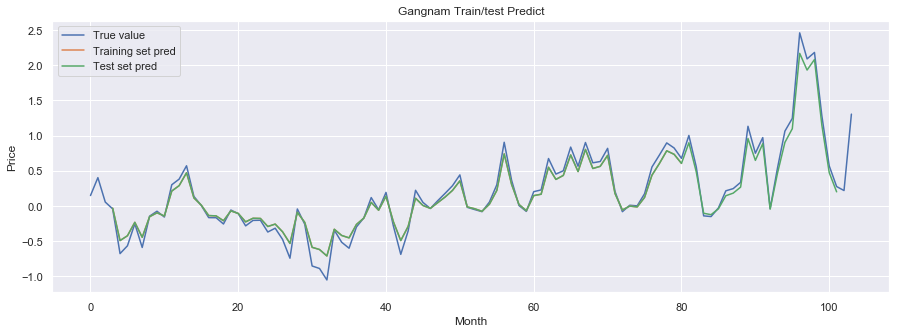

In [198]:
start_predict_n_plot(dataset, train_predict, test_predict)